In [1]:
#%matplotlib notebook

In [2]:
#basic imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

In [3]:
# initial conditions
init = {
    "x0": 0,
    "y0": 1,
    "z0": 1.05
}

# parameters
params = {
    "sigma": 10,
    "b": 8/3,
    "r": 50,
    "N": 15000,
    "T": 60
}

In [4]:
def lorenz_system_with_euler(initial_conditions:dict, paramaters:dict):
    """
    Computes the solutions with explicit euler's method
    :param initial_conditions: Dictionary of initial conditions.
    :param paramaters: Dictionary of parameters.
    :return:
    """

    print(f"Parmaters: {paramaters}\n"
          f"Initial conditions: {initial_conditions}\n")

    # initial conditions and parameters
    x0, y0, z0 = [initial_conditions[key] for key in initial_conditions.keys()]
    sg, b, r, n, tt = [paramaters[key] for key in paramaters.keys()]

    # time sampling
    h = tt / n
    t = np.linspace(0, tt, n, endpoint=False)
    # t = np.arange(0,tt,h)

    # initializing solutions vectors
    x_solutions = np.zeros(t.size)
    y_solutions = np.zeros(t.size)
    z_solutions = np.zeros(t.size)

    # initializing solutions
    x_solutions[0] = x0
    y_solutions[0] = y0
    z_solutions[0] = z0

    # computing
    for i in range(1, t.size):
        x_solutions[i] = x_solutions[i-1] + h * sg * (y_solutions[i-1] - x_solutions[i-1])

        y_solutions[i] = y_solutions[i-1] + h * ( r * x_solutions[i-1] - y_solutions[i-1] - x_solutions[i-1] * z_solutions[i-1] )

        z_solutions[i] = z_solutions[i-1] + h * ( x_solutions[i-1] * y_solutions[i-1] - b * z_solutions[i-1] )

    return x_solutions, y_solutions, z_solutions

In [5]:
x,y,z = lorenz_system_with_euler(init,params)

Parmaters: {'sigma': 10, 'b': 2.6666666666666665, 'r': 50, 'N': 15000, 'T': 60}
Initial conditions: {'x0': 0, 'y0': 1, 'z0': 1.05}



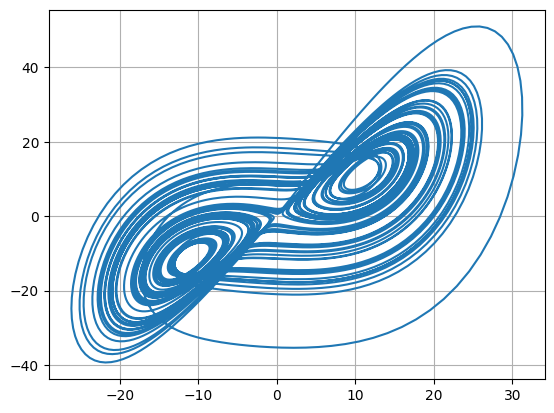

In [6]:
plt.plot(x,y)
plt.grid(True)
plt.show()

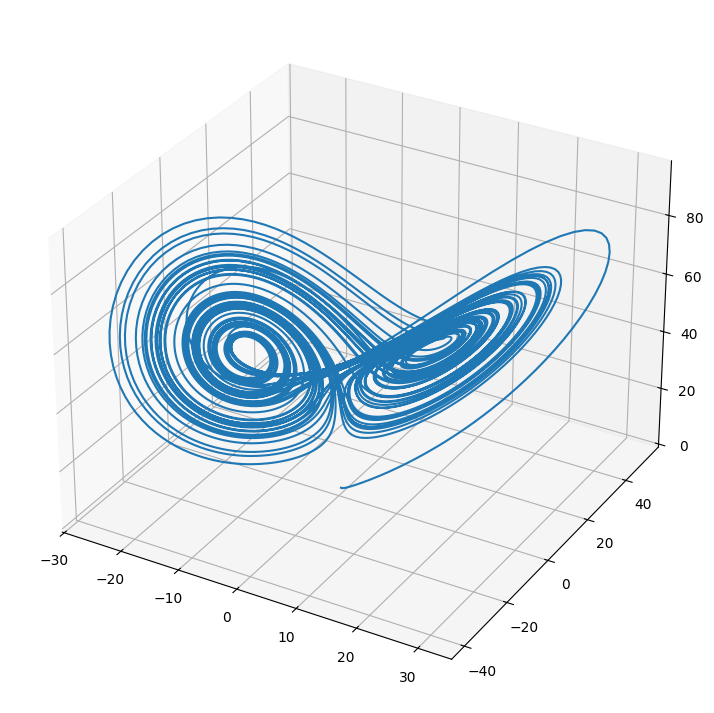

In [7]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x,y,z)